In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
print(sanjuan_dataset.head())
print("Number of observations: ", len(sanjuan_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  988


In [3]:
sanjuan_cases = sanjuan_dataset["total_cases"].values
print(sanjuan_cases.shape)

(988,)


In [5]:
split_index = int(len(sanjuan_cases)* 0.7)
window_size = 4
future_steps = 3
train = sanjuan_cases[:split_index+window_size]

#Test goes from train to end - future_steps (as this data will be feed into the model)
#Expected is always future_steps ahead of test as this is the expected predictions
test = sanjuan_cases[split_index+window_size:-future_steps]
expected = sanjuan_cases[split_index+window_size+future_steps:]

print(train.shape)
print(test.shape)
print(expected.shape)

(695,)
(290,)
(290,)


E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=25.090158, expected=41.000000
predicted=38.948422, expected=34.000000
predicted=27.459629, expected=30.000000
predicted=38.883569, expected=39.000000
predicted=44.742175, expected=39.000000
predicted=32.801544, expected=39.000000
predicted=29.299613, expected=34.000000
predicted=41.923349, expected=30.000000
predicted=39.196977, expected=37.000000
predicted=39.063457, expected=29.000000
predicted=33.971587, expected=26.000000
predicted=28.384491, expected=15.000000
predicted=38.144284, expected=22.000000
predicted=26.232687, expected=15.000000
predicted=23.374543, expected=20.000000
predicted=10.912405, expected=14.000000
predicted=20.862647, expected=10.000000
predicted=11.542902, expected=21.000000
predicted=18.960880, expected=14.000000
predicted=12.807736, expected=14.000000
predicted=7.217760, expected=9.000000
predicted=23.829272, expected=11.000000
predicted=12.392422, expected=5.000000
predicted=12.935800, expected=6.000000
predicted=8.401811, expected=7.000000
predic

predicted=71.036421, expected=170.000000
predicted=122.895648, expected=135.000000
predicted=113.836215, expected=106.000000
predicted=101.258209, expected=68.000000
predicted=194.772903, expected=48.000000
predicted=144.341541, expected=48.000000
predicted=99.196386, expected=26.000000
predicted=58.116681, expected=33.000000
predicted=31.871796, expected=29.000000
predicted=31.595481, expected=17.000000
predicted=8.215182, expected=12.000000
predicted=23.666800, expected=13.000000
predicted=24.853664, expected=17.000000
predicted=10.238219, expected=15.000000
predicted=6.535304, expected=14.000000
predicted=10.735729, expected=15.000000
predicted=15.484753, expected=10.000000
predicted=13.547537, expected=9.000000
predicted=13.518380, expected=2.000000
predicted=15.572305, expected=6.000000
predicted=8.765357, expected=8.000000
predicted=7.441236, expected=5.000000
predicted=-0.764557, expected=1.000000
predicted=4.803078, expected=2.000000
predicted=7.919318, expected=3.000000
predic

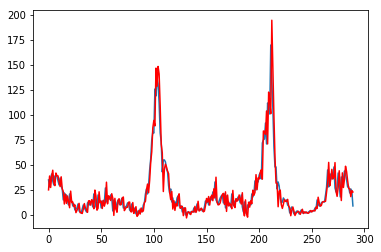

In [6]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=4) #future_steps+1
    yhat = output[0][future_steps]
    
    predictions.append(yhat)
    obs = expected[t]
    history.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(expected, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(expected, predictions)
print(mae)

11.011774401058249


In [8]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

mape = mean_absolute_percentage_error(expected, predictions)
print(mape)

1.3370535469863438e+16
